----

# 1. Inicialización

In [1]:
# Importar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from math import factorial
import seaborn as sns
from matplotlib import pyplot as plt


## 1.1 Cargue del dataset

In [2]:
# Cargar los archivos de datos en un DataFrame:

games = pd.read_csv('/datasets/games.csv')

# 2. Preparación de datos

In [3]:
# Imprimir la información sobre el DataFrame cargado:
print(f"\nForma del DataFrame: {games.shape}")
print()
games.info()
print()
print(f"\nFilas completamente identicas: {games.duplicated().sum()}")
print()
games.sample(3)


Forma del DataFrame: (16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Filas completamente identicas: 0



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6338,Harry Potter and the Order of the Phoenix,PS2,2007.0,Action,0.13,0.10,0.0,0.03,61.0,8,E10+
8856,Rocky,XB,2002.0,Fighting,0.11,0.03,0.0,0.01,74.0,7.3,T
10993,The Daring Game for Girls,Wii,NaN,Adventure,0.09,0.00,0.0,0.01,NaN,tbd,E


## 2.1 Corrección nombres de columnas

In [4]:
# Quitar espacios en blanco y dejar en minusculas los nombres de columnas del DataFrame, asegurando la forma de snake_case:
new_col_names = []
for old_name in games.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    new_col_names.append(name_lowered)

games.columns = new_col_names
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Corrección de tipos de datos en el DataFrame

In [5]:
# Se verifica el tipo de datos asociados a la columna rating para determinar si es el correcto.

In [6]:
print(games.groupby('rating')['rating'].count())
print()
games['rating'].dtype
#print(games.describe())

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64



dtype('O')

In [7]:

#Se identifica tipo de datos errado para las columnas year_of_release y user_score:
games['year_of_release']= games['year_of_release'].astype('Int64')
print(f"tipo de dato correcto para 'year_of_release': {games['year_of_release'].dtype}")
print()

tipo de dato correcto para 'year_of_release': Int64



Se genera cambio del tipo de dato en year_of_release de float64 a int64 debido a que el año no requiere tener decimales, por otra parte se hace el cambio de user_score desde object a float64 ya que las calificaciones si presentan decimales y adicionalmente se reemplazan los datos como tbd a NaN para poder generar dicho cambio.

In [8]:
# Se validan los datos asociados a user_score y se identifica un valor no numérico "tbd" que significa por determinar.
print(games.groupby('user_score')['user_score'].count())
# Por lo tanto, se debe convertir 'tbd' a NaN y luego a float64 teniendo en cuenta que es el tipo de datos correcto para esta columna.
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float64')
print()
print(f"tipo de dato correcto para 'user_score': {games['user_score'].dtype}")

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

tipo de dato correcto para 'user_score': float64


El dato 'tbd' identificado en la columna user_score puede indicar que no existen suficientes calificaciones de los usuarios para generar un promedio, que el juego es nuevo y aún no tiene calificaciones o que el dataset no tiene la información completa. De las 16715 filas del dataset, solo 10014 presentan user_score; sin embargo, hay 2424 que corresponden a datos por determinar. Lo anterior también puede dejar visible una oportunidad de mejora sobre incentivar la calificación por parte de los usuarios.

In [9]:
# Se verifica nuevamente que los tipos de datos sean correctos:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## 2.3 Valores Ausentes

In [10]:
# Se verifican las columnas con valores ausentes:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


- Se observa que la columna **name** presenta 2 valores nulos, no es posible rellenar dichos valores ya que son datos únicos de los cuales no tenemos un id o un valor del que podamos rellenar esa información nula.
  
- El campo **year_of_release** presenta datos nulos, por lo cual no tendremos en 269 filas el año de lanzamiento del juego, para lo cual se requiere validar si ese mismo nombre de juego en otras filas cuenta con el año de lanzamiento para poder rellenarlo y disminuir esos valores nulos.

In [11]:
# Obtener los nombres de juegos que tienen year_of_release nulo
juegos_sin_año = games[games['year_of_release'].isna()]['name'].unique()
print(f"Cantidad de juegos únicos sin año: {len(juegos_sin_año)}")
print()
print("Primeros 3 juegos sin año:")
for game in juegos_sin_año[:3]:
    print(f"- {game}")


Cantidad de juegos únicos sin año: 232

Primeros 3 juegos sin año:
- Madden NFL 2004
- FIFA Soccer 2004
- LEGO Batman: The Videogame


In [12]:
# Ejemplo con un juego específico
nombre_juego = 'LEGO Batman: The Videogame'
todas_las_filas = games[games['name'] == nombre_juego]
print(f"Todas las filas del juego '{nombre_juego}':")
print(todas_las_filas[['name', 'platform', 'year_of_release']])

Todas las filas del juego 'LEGO Batman: The Videogame':
                             name platform  year_of_release
397    LEGO Batman: The Videogame     X360             2008
456    LEGO Batman: The Videogame      Wii             <NA>
460    LEGO Batman: The Videogame       DS             2008
1519   LEGO Batman: The Videogame      PS3             2008
1538   LEGO Batman: The Videogame      PSP             <NA>
1553   LEGO Batman: The Videogame      PS2             2008
12465  LEGO Batman: The Videogame       PC             2008


Se identifica que en el juego LEGO el año de lanzamiento para todas las plataformas es el mismo; sin embargo, para tomar la decisión final de relleno de datos es necesario generar una validación en la que se demuestre si un juego puede tener años de lanzamiento diferentes según la plataforma.

In [13]:
# Agrupar por nombre de juego y contar los años de lanzamiento únicos
juegos_con_diferentes_años = games.groupby('name')['year_of_release'].nunique()

# Filtrar juegos que tienen más de un año de lanzamiento
juegos_con_años_diferentes = juegos_con_diferentes_años[juegos_con_diferentes_años > 1].index

# Mostrar detalles de estos juegos
for juego in juegos_con_años_diferentes[:2]:  # los primeros 2 como ejemplo
    print(f"\n--- Detalles del juego: {juego} ---")
    detalles_juego = games[games['name'] == juego]
    print(detalles_juego[['name', 'platform', 'year_of_release']])


--- Detalles del juego: 11eyes: CrossOver ---
                    name platform  year_of_release
15091  11eyes: CrossOver     X360             2009
15656  11eyes: CrossOver      PSP             2010

--- Detalles del juego: 18 Wheeler: American Pro Trucker ---
                                   name platform  year_of_release
4805   18 Wheeler: American Pro Trucker      PS2             2001
10076  18 Wheeler: American Pro Trucker       GC             2002


De acuerdo con el resultado anterior, se evidencia que no se puede generar relleno del año de lanzamiento por juego, debido a que puede variar por plataforma, por lo tanto no se rellenan los valores nulos para no afectar el análisis futuro.

- Para la columna **genre** existen 2 valores vacíos, por lo que se debe validar si corresponden a nombres que ya tienen género en otras filas para rellenarlos.

In [14]:
# Obtener los nombres de juegos que tienen genero nulo
juegos_sin_genero = games[games['genre'].isna()]['name'].unique()
print(f"Cantidad de juegos únicos sin género: {len(juegos_sin_genero)}")
print()

filas_nan = games[games['genre'].isna()]
print(filas_nan)


Cantidad de juegos únicos sin género: 1

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Al validar las filas con **genre** nulo se identifica que corresponden a las mismas 2 filas con nombre nulo, por lo cual no es posible validar a qué nombre y género corresponden para generar un relleno de datos.

- Para la columna **critic_score** y **user_score** se evidencian 8578 y 9125 valores nulos respectivamente, sin embargo no pueden rellenarse con los puntajes del mismo juego, ya que estos valores no son iguales en todas las plataformas como se observa a continuación:

In [15]:
# Seleccionar un juego que aparezca en múltiples plataformas y tenga puntajes
juego_ejemplo = games[games['name'].notna() & games['critic_score'].notna()]['name'].value_counts().head(1).index[0]

print(f"Ejemplo con el juego: {juego_ejemplo}")
print()

# Ver todas las filas de este juego
filas_ejemplo = games[games['name'] == juego_ejemplo][['name', 'platform', 'critic_score', 'user_score']]
print(filas_ejemplo)

Ejemplo con el juego: Madden NFL 07

                name platform  critic_score  user_score
241    Madden NFL 07      PS2          84.0         8.2
972    Madden NFL 07     X360          80.0         6.0
2035   Madden NFL 07       XB          83.0         8.7
2479   Madden NFL 07      PSP          78.0         6.6
3229   Madden NFL 07       GC          82.0         9.2
3838   Madden NFL 07      PS3          76.0         4.2
4006   Madden NFL 07      Wii          81.0         8.0
7372   Madden NFL 07       DS          70.0         6.5
14889  Madden NFL 07      GBA          68.0         9.3


Por lo tanto, se realiza el relleno de valores nulos en los campos de 'critic_score' y 'user_score', con el valor promedio de cada puntaje, ya que este no tiene en cuenta los valores nulos y representa el valor real medio del mismo juego en las diferentes plataformas.

In [16]:
# Calcular el promedio de critic_score por juego
mean_critic_score = games.groupby('name')['critic_score'].mean()

# Función para rellenar critic_score nulo con el promedio teniendo en cuenta que existen nombres tambien con valor nulo:
def fill_critic_score(row):
    if pd.isna(row['critic_score']):
        if pd.isna(row['name']):
            return np.nan
        return mean_critic_score.get(row['name'], np.nan)
    return row['critic_score']
    
# Aplicar la función a cada fila
games['critic_score'] = games.apply(fill_critic_score, axis=1)


In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


- Para el campo **rating**, este corresponde a la clasificación ESRB de cada juego para categorizarlo por edad. Por lo que se puede validar por nombre si es viable rellenar dicha clasificación con filas que ya la contengan para el mismo juego:

In [18]:
# Primero, obtener los nombres de juegos que tienen rating nulo
juegos_sin_rating = games[games['rating'].isna()]['name'].unique()
print(f"Cantidad de juegos únicos sin rating: {len(juegos_sin_rating)}")

# Validar cuáles juegos sin rating tienen información de rating en otras filas
juegos_rating_recuperables = []
for juego in juegos_sin_rating:
    if pd.notna(juego):  # Verificar que el nombre no sea NaN
        filas_juego = games[games['name'] == juego]
        # Verificar si alguna fila tiene rating
        if filas_juego['rating'].notna().any():
            juegos_rating_recuperables.append(juego)

print(f"Juegos que se pueden rellenar: {len(juegos_rating_recuperables)}")

# Ahora mostrar un ejemplo de un juego que SÍ se puede rellenar
if len(juegos_rating_recuperables) > 0:
    ejemplo = juegos_rating_recuperables[0]  # Cambio aquí: usar juegos_rating_recuperables
    print(f"\nEjemplo con {ejemplo}:")
    filas_ejemplo = games[games['name'] == ejemplo][['name', 'platform', 'rating']]
    print(filas_ejemplo)



Cantidad de juegos únicos sin rating: 5853
Juegos que se pueden rellenar: 359

Ejemplo con Donkey Kong Country:
                    name platform rating
71   Donkey Kong Country     SNES    NaN
748  Donkey Kong Country       GB    NaN
836  Donkey Kong Country      GBA      E


De acuerdo con el resultado anterior, se observa que existen juegos con la información de rating en otras filas, por lo cual pueden rellenarse para las que presentan valores nulos.

In [19]:


# Rellenar rating usando el rating disponible del mismo juego en otras filas
for juego in juegos_rating_recuperables:
    filas_juego = games[games['name'] == juego]


    
    # Obtener el rating válido (el primer valor no nulo)
    rating_valido = filas_juego['rating'].dropna().iloc[0]
    
    # Rellenar todos los NaN de este juego con el rating válido
    games.loc[games['name'] == juego, 'rating'] = games.loc[games['name'] == juego, 'rating'].fillna(rating_valido)

print("¡Relleno completado!")

¡Relleno completado!


In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           10386 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## Enriquecer los datos

In [21]:
# Calcular las ventas totales para cada juego en todas las regiones
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1754,Final Fantasy Tactics: The War of the Lions,PSP,2007,Role-Playing,0.45,0.24,0.30,0.16,88.0,8.0,T,1.15
2603,Rare Replay,XOne,2015,Misc,0.49,0.22,0.01,0.07,84.0,7.7,M,0.79
3032,Blazing Angels: Squadrons of WWII,PS3,2006,Simulation,0.35,0.22,0.00,0.10,67.0,6.9,T,0.67


# 3. Análisis de datos

In [22]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,9098.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.761399,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,14.104795,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Según las estadísticas del DataFrame se identifica que:
- La fecha de lanzamiento se encuentra entre los años 1980 y 2016; su desviación estándar está por encima de los 5 años.
- Las ventas de Norteamérica tienen valores máximos respecto a las de Europa, Japón y otras regiones, aunque para todas existen juegos con cero ventas.
- Al comparar las ventas de Japón con otras regiones se observa que son menores a las regiones no identificadas, quizás porque corresponden a la sumatoria de diferentes lugares.
- El puntaje crítico se encuentra entre 13 y 98 puntos; por otra parte, el puntaje de usuario está entre 0 y 9,7, lo que identifica que el usuario es más radical en la valoración del juego o el dataset no está tomando la información completa.
- Las ventas totales se encuentran entre 1,5 y 82,5 millones de dólares.

## 3.1 Juegos Lanzados en diferentes años

In [23]:
# Verificar cuantos juegos fueron lanzados en diferentes años

# Agrupar por juego y año de lanzamiento
juegos_años_stats = games.groupby('name')['year_of_release'].agg(['nunique', 'min', 'max']).reset_index()
juegos_años_stats['diferencia_años'] = juegos_años_stats['max'] - juegos_años_stats['min']

# Filtrar juegos con múltiples años
multiples_años = juegos_años_stats[juegos_años_stats['nunique'] > 1]

print(f"Juegos con múltiples años de lanzamiento: {len(multiples_años)}")
print(f"Diferencia promedio de años: {multiples_años['diferencia_años'].mean():.1f} años")
print(f"Máxima diferencia de años: {multiples_años['diferencia_años'].max()} años")


Juegos con múltiples años de lanzamiento: 694
Diferencia promedio de años: 3.4 años
Máxima diferencia de años: 34 años


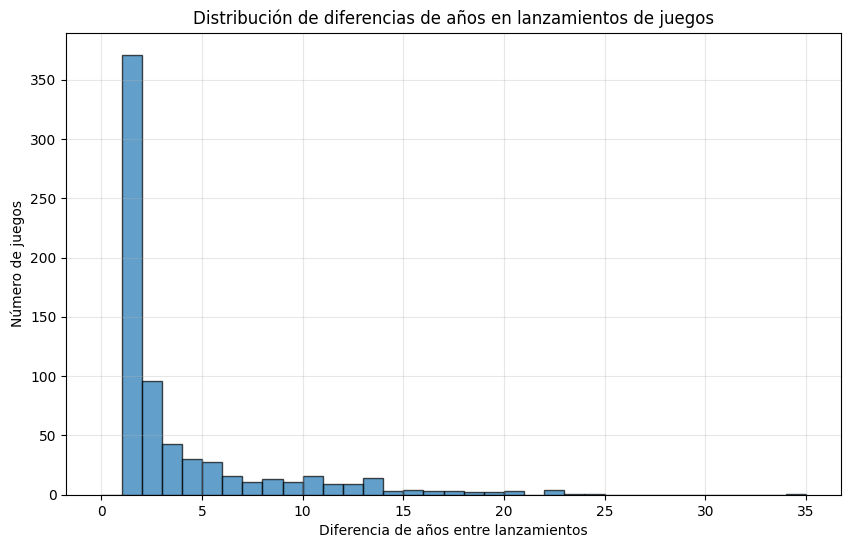

In [24]:
#Graficar la distribución de las diferencias de años de lanzamiento de los juegos 
plt.figure(figsize=(10, 6))
plt.hist(multiples_años['diferencia_años'], bins=range(0, int(multiples_años['diferencia_años'].max()) + 2), 
         edgecolor='black', alpha=0.7)
plt.xlabel('Diferencia de años entre lanzamientos')
plt.ylabel('Número de juegos')
plt.title('Distribución de diferencias de años en lanzamientos de juegos')
plt.grid(True, alpha=0.3)
plt.show()

Según el gráfico de distribución, se observa que más de la mitad de los 694 juegos con diferentes años de lanzamiento se realizaron con una diferencia de 2 años. Por otra parte, 694 juegos respecto al total de juegos únicos en el dataset (11.559) corresponden al 6% de la muestra, siendo un porcentaje pequeño sobre el total, pero la cantidad que varía sobre los 694 en 2 años sí es considerable, puesto que supera al 50% del filtro.

In [335]:
games['name'].nunique()

11559

## 3.2 Distribución de ventas totales anuales por plataforma 

In [336]:
# Calcular el total de plataformas únicas
total_plataformas = games['platform'].nunique()
print(f"Total de plataformas en el dataset: {total_plataformas}")

Total de plataformas en el dataset: 31


In [337]:
# Verificar el % de ventas totales por plataforma.
#Agrupar por plataforma y ventas totales, ordenando de forma descendente:
total_ventas_plataforma = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Calcular el total general de ventas para el cálculo del %
total_general = total_ventas_plataforma['total_sales'].sum()

# Agregar la columna de porcentaje
total_ventas_plataforma['porcentaje'] = (total_ventas_plataforma['total_sales'] / total_general) * 100

# Agregar la columna de porcentaje acumulado
total_ventas_plataforma['porcentaje_acumulado'] = total_ventas_plataforma['porcentaje'].cumsum()

# Mostrar el resultado
print(total_ventas_plataforma)


   platform  total_sales  porcentaje  porcentaje_acumulado
0       PS2      1255.77   14.084913             14.084913
1      X360       971.42   10.895599             24.980512
2       PS3       939.65   10.539262             35.519774
3       Wii       907.51   10.178774             45.698548
4        DS       806.12    9.041568             54.740116
5        PS       730.86    8.197440             62.937556
6       GBA       317.85    3.565055             66.502612
7       PS4       314.14    3.523443             70.026055
8       PSP       294.05    3.298111             73.324166
9        PC       259.52    2.910817             76.234983
10      3DS       259.00    2.904985             79.139968
11       XB       257.74    2.890852             82.030820
12       GB       255.46    2.865279             84.896099
13      NES       251.05    2.815816             87.711915
14      N64       218.68    2.452749             90.164664
15     SNES       200.04    2.243680             92.4083

Se observa que el 80 % de las ventas totales corresponden a 12 de las 31 plataformas del dataset, sin embargo es necesario validar si corresponden a las más populares de ventas por año. 

In [338]:
# Top 15 plataformas con mayores ventas totales por año
top_ventas_df = games.groupby(['platform','year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index()
print("Top 15 combinaciones plataforma-año:")
print(top_ventas_df.head(15))


Top 15 combinaciones plataforma-año:
   platform  year_of_release  total_sales
0       PS2             2004       211.81
1       Wii             2009       206.97
2       PS2             2002       205.38
3       PS2             2003       184.31
4       Wii             2008       171.32
5      X360             2010       170.03
6        PS             1998       169.49
7       PS2             2001       166.43
8       PS2             2005       160.66
9       PS3             2011       156.78
10      Wii             2007       152.77
11       DS             2007       146.94
12       DS             2008       145.31
13       PS             1999       144.53
14     X360             2011       143.84


Se identifica que de las 12 plataformas con más ventas totales, al analizar el comportamiento de venta anual, se reducen a 6 plataformas que se encuentran dentro del top 15.

In [339]:
# Validar comportamiento de plataformas del top 15
#Seleccionar algunas plataformas para comparar:
plataformas_comparar = ['PS2', 'Wii', 'X360', 'PS', 'PS3',  'DS']

# Filtrar datos para estas plataformas
datos_comparacion = top_ventas_df[
    top_ventas_df['platform'].isin(plataformas_comparar)
]

# Ver estadísticas básicas por plataforma
print("Estadísticas de ventas por plataforma:")
for plataforma in plataformas_comparar:
    datos_plataforma = datos_comparacion[datos_comparacion['platform'] == plataforma]
    if len(datos_plataforma) > 0:
        print(f"\n{plataforma}:")
        print(f"  - Ventas promedio por año: {datos_plataforma['total_sales'].mean():.2f}")
        print(f"  - Ventas máximas en un año: {datos_plataforma['total_sales'].max():.2f}")
        print(f"  - Años activos: {datos_plataforma['year_of_release'].min():.0f} - {datos_plataforma['year_of_release'].max():.0f}")


Estadísticas de ventas por plataforma:

PS2:
  - Ventas promedio por año: 102.80
  - Ventas máximas en un año: 211.81
  - Años activos: 2000 - 2011

Wii:
  - Ventas promedio por año: 81.02
  - Ventas máximas en un año: 206.97
  - Años activos: 2006 - 2016

X360:
  - Ventas promedio por año: 80.10
  - Ventas máximas en un año: 170.03
  - Años activos: 2005 - 2016

PS:
  - Ventas promedio por año: 72.76
  - Ventas máximas en un año: 169.49
  - Años activos: 1994 - 2003

PS3:
  - Ventas promedio por año: 84.67
  - Ventas máximas en un año: 156.78
  - Años activos: 2006 - 2016

DS:
  - Ventas promedio por año: 72.98
  - Ventas máximas en un año: 146.94
  - Años activos: 1985 - 2013


## 3.3 Análisis ciclo de vida plataformas

In [340]:
# Analizar el ciclo de vida de cada plataforma
ciclo_vida_plataformas = games.groupby('platform')['year_of_release'].agg([
    'min',      # Primer año con ventas
    'max',      # Último año con ventas
    'count'     # Cantidad de juegos
]).reset_index()

# Calcular la duración de vida de cada plataforma
ciclo_vida_plataformas['duracion_años'] = ciclo_vida_plataformas['max']  - ciclo_vida_plataformas['min']

# Ordenar por año de inicio
ciclo_vida_plataformas = ciclo_vida_plataformas.sort_values('duracion_años', ascending=False)

print("Ciclo de vida de las plataformas:")
print(ciclo_vida_plataformas)


Ciclo de vida de las plataformas:
   platform   min   max  count  duracion_años
13       PC  1985  2016    957             31
4        DS  1985  2013   2121             28
5        GB  1988  2001     97             13
28     X360  2005  2016   1232             11
19      PSP  2004  2015   1193             11
16      PS2  2000  2011   2127             11
11      NES  1983  1994     98             11
3        DC  1998  2008     52             10
26      Wii  2006  2016   1286             10
17      PS3  2006  2016   1306             10
0      2600  1980  1989    116              9
23     SNES  1990  1999    239              9
15       PS  1994  2003   1190              9
29       XB  2000  2008    803              8
6       GBA  2000  2007    811              7
7        GC  2001  2007    542              6
10      N64  1996  2002    316              6
2       3DS  2011  2016    512              5
20      PSV  2011  2016    429              5
21      SAT  1994  1999    173              5


La plataforma con más años de duración es el PC con 31 años; sin embargo, no es una de las del top 15 en mayores ventas totales anuales. Por otra parte, existen 3 plataformas que no alcanzaron el año de duración (TG16, PCFX y GG). La plataforma DS que hace parte del top 15 de ventas tuvo una duración de 28 años, sin embargo, a la actualidad del año 2016 no se encuentra activa, puesto que su última venta fue en el año 2013.

In [341]:
# Idenfiticar plataformas que no se encuentran activas al 2016
año_actual_dataset = games['year_of_release'].max()

# Clasificar plataformas
ciclo_vida_plataformas['estado'] = ciclo_vida_plataformas['max'].apply(
    lambda x: 'Activa' if x >= año_actual_dataset - 1 else 'Descontinuada'
)

# Ver plataformas descontinuadas que antes eran populares
plataformas_descontinuadas = ciclo_vida_plataformas[
    ciclo_vida_plataformas['estado'] == 'Descontinuada'
].sort_values('count', ascending=False)

print("Plataformas descontinuadas (ordenadas por cantidad de juegos):")
print(plataformas_descontinuadas.head(10))
print()
print(plataformas_descontinuadas.mean())

Plataformas descontinuadas (ordenadas por cantidad de juegos):
   platform   min   max  count  duracion_años         estado
16      PS2  2000  2011   2127             11  Descontinuada
4        DS  1985  2013   2121             28  Descontinuada
15       PS  1994  2003   1190              9  Descontinuada
6       GBA  2000  2007    811              7  Descontinuada
29       XB  2000  2008    803              8  Descontinuada
7        GC  2001  2007    542              6  Descontinuada
10      N64  1996  2002    316              6  Descontinuada
23     SNES  1990  1999    239              9  Descontinuada
21      SAT  1994  1999    173              5  Descontinuada
0      2600  1980  1989    116              9  Descontinuada

min              1993.380952
max              2000.190476
count             416.428571
duracion_años       6.809524
dtype: float64


Existen plataformas descontinuadas pero que eran populares según el top 15 como PS2, DS y PS que al año 2016 no continúan vigentes quizás por cambios tecnológicos en los que surgieron nuevas plataformas más atractivas para los usuarios en temas de velocidad y diseño gráfico. Por otra parte existen plataformas que desaparecen desde los 5 años de antiguedad haga los 28 años que corresponde a un dato atípico validando el comportamiento de las plataformas descontinuadas con una media de duración de 6,8 años.

In [342]:
# Trazabilidad Inicio y Fin por plataforma
año_actual = games['year_of_release'].max()

tabla_detallada = games.groupby('platform')['year_of_release'].agg([
    ('año_lanzamiento', 'min'),
    ('ultimo_año_ventas', 'max'),
    ('total_juegos', 'count')
]).reset_index()

# Agregar información adicional
tabla_detallada['duracion_años'] = tabla_detallada['ultimo_año_ventas'] - tabla_detallada['año_lanzamiento']
tabla_detallada['estado'] = tabla_detallada['ultimo_año_ventas'].apply(
    lambda x: 'Activa' if x >= año_actual - 1 else 'Descontinuada'
)

# Ordenar por año de lanzamiento
tabla_detallada = tabla_detallada.sort_values('año_lanzamiento')

print("Tabla detallada del ciclo de vida de plataformas:")
print(tabla_detallada)

Tabla detallada del ciclo de vida de plataformas:
   platform  año_lanzamiento  ultimo_año_ventas  total_juegos  duracion_años  \
0      2600             1980               1989           116              9   
11      NES             1983               1994            98             11   
4        DS             1985               2013          2121             28   
13       PC             1985               2016           957             31   
5        GB             1988               2001            97             13   
23     SNES             1990               1999           239              9   
8       GEN             1990               1994            29              4   
9        GG             1992               1992             1              0   
22      SCD             1993               1994             6              1   
12       NG             1993               1996            12              3   
21      SAT             1994               1999           173         

No existe un tiempo promedio en el que desaparcen las plataformas ya que en su mayoria el tiempo de duración es distinto, respecto a la nuevas plataformas tambien varian ya que hay años en los que aparece mas de 1 y otros cada 1, 2 o 3 años, como también se observa un salto entre el 2006 y el 2011 donde no aparecieron plataformas nuevas.

## 3.4 Segregación de datos para análisis

Se tomará la información del año 2014 al 2016, teniendo en cuenta que el ejercicio indica que los datos del año 2016 podrían estar incompletos, y para hacer pronósticos de ventas para el 2017, es necesario contar con un periodo aproximado de 2 años en históricos, si es posible. Por otra parte, según el ciclo de vida de las plataformas, en algunos casos no perduran más de un año, por lo cual no se considera relevante la información anterior al 2014.

In [343]:
# Filtrar datos desde 2014 en adelante
datos_recientes = games[games['year_of_release'] >= 2014].copy()

# Calcular ventas totales por plataforma y año
ventas_por_año_plataforma = datos_recientes.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Ver qué plataformas tienen datos en este período
plataformas_activas_2014 = ventas_por_año_plataforma['platform'].unique()
print(f"Plataformas activas desde 2014: {len(plataformas_activas_2014)}")
print(plataformas_activas_2014)


Plataformas activas desde 2014: 10
['3DS' 'PC' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii' 'WiiU' 'X360' 'XOne']


In [344]:
# Crear una tabla dinámica para observar las ventas por año y plataforma
tabla_ventas_anuales = ventas_por_año_plataforma.pivot(
    index='platform', 
    columns='year_of_release', 
    values='total_sales'
).fillna(0)

# Calcular totales y tendencias
tabla_ventas_anuales['total_2014_2016'] = tabla_ventas_anuales.sum(axis=1)
tabla_ventas_anuales['tendencia'] = tabla_ventas_anuales[2016.0] - tabla_ventas_anuales[2014.0]

# Ordenar por ventas totales del período
tabla_ventas_anuales = tabla_ventas_anuales.sort_values('total_2014_2016', ascending=False)

print("Ventas por plataforma 2014-2016:")
print()
print(tabla_ventas_anuales)

Ventas por plataforma 2014-2016:

year_of_release    2014    2015   2016  total_2014_2016  tendencia
platform                                                          
PS4              100.00  118.90  69.25           288.15     -30.75
XOne              54.07   60.14  26.15           140.36     -27.92
3DS               43.76   27.78  15.14            86.68     -28.62
PS3               47.76   16.82   3.60            68.18     -44.16
X360              34.74   11.96   1.52            48.22     -33.22
WiiU              22.03   16.35   4.60            42.98     -17.43
PC                13.28    8.52   5.25            27.05      -8.03
PSV               11.90    6.25   4.25            22.40      -7.65
Wii                3.75    1.14   0.18             5.07      -3.57
PSP                0.24    0.12   0.00             0.36      -0.24


Las plataformas líderes en los últimos 3 años son PS4, Xone y 3DS, sin embargo las 10 plataformas activas desde el 2014 se encuentran en su totalidad en declive de ventas según la columna de tendencia y el detalle por año donde se evidencia una reducción comercial en el año 2016, esto puede deberse a no tener la muestra completa del año 2016 aunque el presente correspnda al mes de diciembre del mismo año, no se tiene el dato de los meses de la muestra para asegurar que la información del 2016 por lo menos cuente con los 11 meses del año.

## 3.5 Diagrama de caja para ventas globales de juegos por plataforma desde 2014

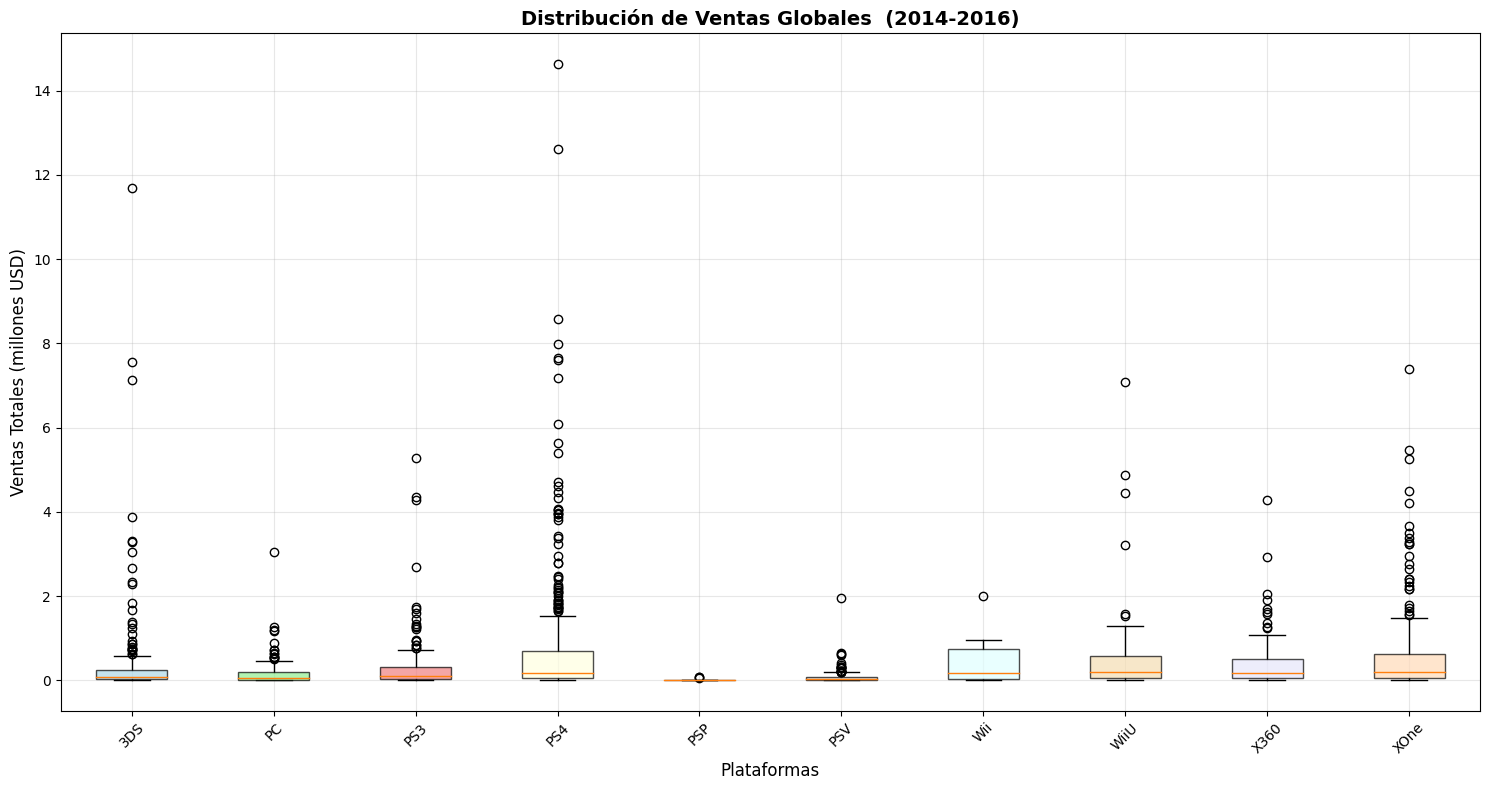

=== Estadísticas Descriptivas por Plataforma (2014-2016) ===
Plataforma  Total_Juegos  Media  Mediana  Q1_25%  Q3_75%  Mínimo  Máximo  Desv_Estándar
      XOne           228  0.616    0.205   0.050   0.633    0.01    7.39          1.047
      WiiU            73  0.589    0.190   0.050   0.570    0.01    7.09          1.161
       PS4           376  0.766    0.185   0.057   0.690    0.01   14.63          1.615
       Wii            11  0.461    0.180   0.035   0.755    0.01    2.01          0.625
      X360           111  0.434    0.180   0.070   0.505    0.01    4.28          0.629
       PS3           219  0.311    0.110   0.040   0.325    0.01    5.27          0.633
       3DS           212  0.409    0.090   0.030   0.250    0.01   11.68          1.188
        PC           151  0.179    0.060   0.020   0.200    0.01    3.05          0.329
       PSV           295  0.076    0.040   0.020   0.090    0.01    1.96          0.142
       PSP            13  0.028    0.020   0.010   0.020   

In [345]:
# Crear diagrama de caja para las ventas globales por plataforma desde 2014
plt.figure(figsize=(15, 8))

# Crear el boxplot
box_plot = plt.boxplot([datos_recientes[datos_recientes['platform'] == plataforma]['total_sales'] 
                       for plataforma in plataformas_activas_2014], 
                      labels=plataformas_activas_2014,
                      patch_artist=True,
                      showfliers=True)

# Personalizar colores
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 
          'lightgray', 'lightcyan', 'wheat', 'lavender', 'peachpuff']

for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Personalizar el gráfico
plt.xlabel('Plataformas', fontsize=12)
plt.ylabel('Ventas Totales (millones USD)', fontsize=12)
plt.title('Distribución de Ventas Globales  (2014-2016)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas por plataforma
estadisticas_plataformas = []

for plataforma in plataformas_activas_2014:
    ventas_plataforma = datos_recientes[datos_recientes['platform'] == plataforma]['total_sales']
    
    # Calcular todas las estadísticas
    estadisticas = {
        'Plataforma': plataforma,
        'Total_Juegos': len(ventas_plataforma),
        'Media': round(ventas_plataforma.mean(), 3),
        'Mediana': round(ventas_plataforma.median(), 3),
        'Q1_25%': round(ventas_plataforma.quantile(0.25), 3),
        'Q3_75%': round(ventas_plataforma.quantile(0.75), 3),
        'Mínimo': round(ventas_plataforma.min(), 3),
        'Máximo': round(ventas_plataforma.max(), 3),
        'Desv_Estándar': round(ventas_plataforma.std(), 3)
    }
    
    estadisticas_plataformas.append(estadisticas)

# Crear DataFrame
tabla_estadisticas = pd.DataFrame(estadisticas_plataformas)

# Ordenar por mediana (de mayor a menor)
tabla_estadisticas = tabla_estadisticas.sort_values('Mediana', ascending=False)

# Mostrar la tabla completa
print("=== Estadísticas Descriptivas por Plataforma (2014-2016) ===")
print(tabla_estadisticas.to_string(index=False))

# Crear una versión más compacta para análisis rápido
#print("\n=== RESUMEN COMPARATIVO (Top 5 por Mediana) ===")
#top_5 = tabla_estadisticas.head(5)[['Plataforma', 'Total_Juegos', 'Mediana', 'Media', 'Máximo']]
#print(top_5.to_string(index=False))


En el gráfico y las estadísticas detalladas por plataforma, se observa que la mediana más alta de ventas corresponde a la plataforma Xone y la menor es para PSP. Respecto al mayor promedio de ventas corresponde a la plataforma PS4 y el menor para PSP, esto puede variar según la integridad de los datos para el año 2016 y por otra parte el precio de los juegos según cada plataforma ya que puede indicar una mayor cantidad de juegos vendidos o una cantidad menor pero a precios más altos respecto a las demás plataformas.

También se visualiza que la plataforma con más valores atípicos es PS4, ya que hay registros que alcanzan hasta más de 14 millones de USD. Se observa una distribución muy concentrada para la plataforma PSP en el periodo de tiempo analizado, quizás debido a que en el año 2016 no presenta ventas y sus valores entre 2014 y 2015 no son muy dispersos.

## 3.6 Impacto en ventas por plataformas según reseñas

In [346]:
# Verificar estadísticas básicas de las reseñas
print("\n=== Estadísticas Reseñas ===")
print("Critic_Score:")
print(datos_recientes['critic_score'].describe())
print("\nUser_Score:")
print(datos_recientes['user_score'].describe())



=== Estadísticas Reseñas ===
Critic_Score:
count    989.000000
mean      72.466862
std       12.650012
min       19.000000
25%       67.000000
50%       74.000000
75%       81.000000
max       97.000000
Name: critic_score, dtype: float64

User_Score:
count    888.000000
mean       6.623536
std        1.589792
min        0.200000
25%        5.800000
50%        7.000000
75%        7.800000
max        9.300000
Name: user_score, dtype: float64


Las reseñas de críticos presentan valores mayores de media y desviación estandar debido a que su rango de calificación se encuentra entre 0 y 100, a diferencia de la reseña del usuario que se encuentra entre 0 y 10 puntos.


correlación entre 'critic_score' y 'total_sales' 0.3067064986219073
correlación entre 'user_score' y 'total_sales' -0.013070305002484585



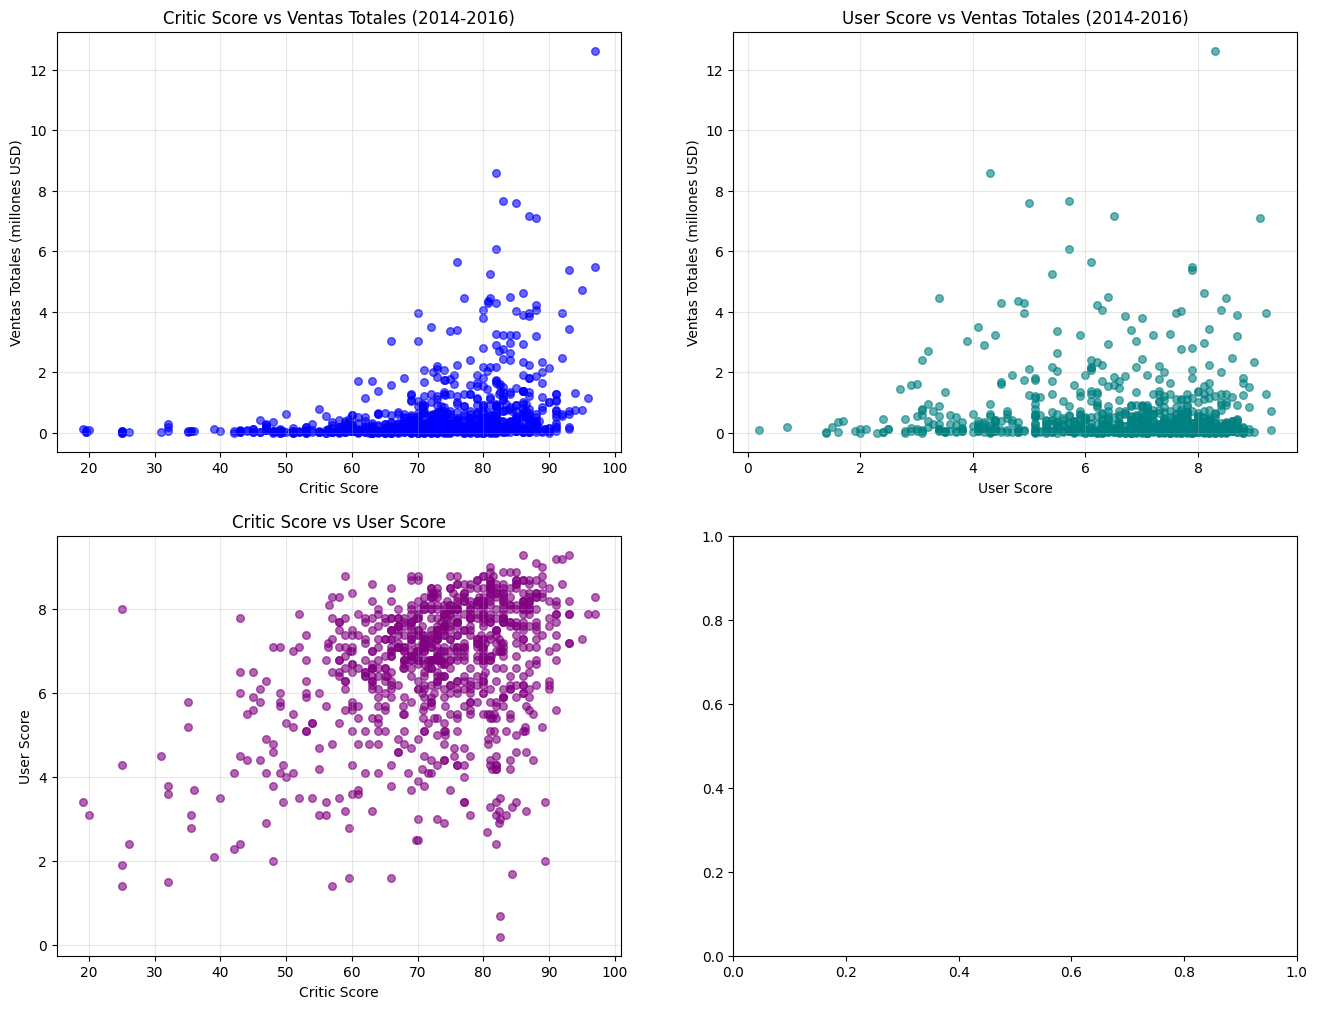

In [347]:
# Crear gráficos de dispersión para reseñas vs ventas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Critic Score vs Ventas Totales
datos_critic = datos_recientes.dropna(subset=['critic_score'])
axes[0,0].scatter(datos_critic['critic_score'], datos_critic['total_sales'], 
                  alpha=0.6, color='blue', s=30)
axes[0,0].set_xlabel('Critic Score')
axes[0,0].set_ylabel('Ventas Totales (millones USD)')
axes[0,0].set_title('Critic Score vs Ventas Totales (2014-2016)')
axes[0,0].grid(True, alpha=0.3)

# 2. User Score vs Ventas Totales
datos_user = datos_recientes.dropna(subset=['user_score'])
axes[0,1].scatter(datos_user['user_score'], datos_user['total_sales'], 
                  alpha=0.6, color='teal', s=30)
axes[0,1].set_xlabel('User Score')
axes[0,1].set_ylabel('Ventas Totales (millones USD)')
axes[0,1].set_title('User Score vs Ventas Totales (2014-2016)')
axes[0,1].grid(True, alpha=0.3)

# 3. Critic Score vs User Score
datos_ambos = datos_recientes.dropna(subset=['critic_score', 'user_score'])
axes[1,0].scatter(datos_ambos['critic_score'], datos_ambos['user_score'], 
                  alpha=0.6, color='purple', s=30)
axes[1,0].set_xlabel('Critic Score')
axes[1,0].set_ylabel('User Score')
axes[1,0].set_title('Critic Score vs User Score')
axes[1,0].grid(True, alpha=0.3)

print()
print(f"correlación entre 'critic_score' y 'total_sales' {datos_critic['critic_score'].corr(datos_critic['total_sales'])}")
print(f"correlación entre 'user_score' y 'total_sales' {datos_user['user_score'].corr(datos_user['total_sales'])}")
print()

- En el primer gráfico se observa la relación con el puntaje de la reseña critica y las ventas en millones de USD, aquí se observa una mayor agrupación del puntaje entre 40 y 90 puntos, también se identifica que las ventas incrementan en los puntajes mayores sin embargo la mayor parte de las ventas se agrupan entre 1 y 2 millones de USD.
- En el segundo gráfico se identifica la relación entre el puntaje de la reseña del usuario y las ventas de los juegos, donde la mayor agrupación se encuentra entre los puntajes 3 y 9, donde las ventas también incrementan conforme aumenta el puntaje de la reseña. Sin embargo, se observan datos atípicos en ventas con puntajes entre los 3 y 6 puntos, lo que da lugar a concluir que el usuario le da mayor importancia a la reseña crítica que a la del usuario final.
- En el tercer gráfico se observa la relación entre reseñas donde se observa una mayor concentración entre los puntajes críticos de 70 y 80 y de los usuarios entre 6 y 8 puntos. Aparentemente tienen una misma relación de acuerdo a los rangos de calificación de cada tipo de reseña
- Al validar la correlación entre 'critic_score' y 'total_sales', se evidencia que corresponde al 0.3, siendo una correlación positiva baja, lo que quiere decir que a medida que la reseña aumenta, las ventas totales también lo hacen, pero una proporción muy modesta.
- Por otra parte al validar la correlación entre 'user_score' y 'total_sales', python nos arroja como resultado -0.01, esta correlación es negativa pero muy cercana a cero lo que constituye que es muy debil y casi inexistente, al ser negativa indica que mientras aumenta la reseña, las ventas disminuyen pero al ser tan minima no es perceptible por lo que se concluye que no hay correlación lineal entre ellas. La correlación No implica Causalidad y tambien se debe contemplar que del DataFrame original solo habian 9098 datos de reseñas criticas y 7590 de reseñas de usuarios respecto a un total de 16715 registros. Lo que indica que la correlación calculada no es confiable puesto a que hacen falta aproximadamente la mitad de los datos para poder realizar un análisis confiable.

## 3.6 Ventas del mismo juego en diversas plataformas

In [348]:
#Agrupar por juego la cantidad de plataformas en las que se encuentra:



juegos_plataforma = datos_recientes.groupby('name')['platform'].count()
juegos_multiplataforma = juegos_plataforma[juegos_plataforma > 1]
print(juegos_multiplataforma.sort_values(ascending=False).head(5))
print()

#Comparativo ventas de juegos en otras plataformas
#Prueba con 1 juego:
juego_seleccionado = "FIFA 15"
ventas_fifa = datos_recientes[datos_recientes['name'] == juego_seleccionado]
print(f"Ventas por plaforma para el juego 'FIFA 15:\n")
print(ventas_fifa[['name', 'platform', 'total_sales']].sort_values('total_sales', ascending=False))


name
LEGO Jurassic World             8
FIFA 15                         8
Lego Batman 3: Beyond Gotham    8
LEGO The Hobbit                 8
The LEGO Movie Videogame        8
Name: platform, dtype: int64

Ventas por plaforma para el juego 'FIFA 15:

         name platform  total_sales
143   FIFA 15      PS4         6.08
264   FIFA 15      PS3         4.28
494   FIFA 15     X360         2.92
754   FIFA 15     XOne         2.18
3381  FIFA 15      PSV         0.60
3611  FIFA 15      Wii         0.56
4279  FIFA 15      3DS         0.46
6097  FIFA 15       PC         0.29


In [349]:
# Comparativo top 5 juegos multiplataforma

# Crear función para analizar varios juegos a la vez:
def analizar_juego_multiplataforma(nombre_juego, datos):
    """Analiza las ventas de un juego específico en múltiples plataformas"""
    ventas_juego = datos[datos['name'] == nombre_juego]
    if len(ventas_juego) > 1:
        print(f"\n=== Análisis de {nombre_juego} ===")
        resultado = ventas_juego[['name', 'platform', 'total_sales']].sort_values('total_sales', ascending=False)
        print(resultado)
        
        # Calcular algunas estadísticas
        print(f"\nPlataforma líder: {resultado.iloc[0]['platform']} ({resultado.iloc[0]['total_sales']:.2f}M)")
        print(f"Diferencia con segunda plataforma: {resultado.iloc[0]['total_sales'] - resultado.iloc[1]['total_sales']:.2f}M")
        return resultado
    else:
        print(f"{nombre_juego} no está disponible en múltiples plataformas")
        return None

# Obtener el top 5 juegos con más plataformas
top_juegos = juegos_multiplataforma.sort_values(ascending=False).head(5).index

for juego in top_juegos:
    analizar_juego_multiplataforma(juego, datos_recientes)



=== Análisis de LEGO Jurassic World ===
                      name platform  total_sales
2301   LEGO Jurassic World      PS4         0.90
2402   LEGO Jurassic World     X360         0.87
2435   LEGO Jurassic World      PS3         0.85
3084   LEGO Jurassic World     XOne         0.66
3230   LEGO Jurassic World      3DS         0.62
3840   LEGO Jurassic World     WiiU         0.52
7124   LEGO Jurassic World      PSV         0.23
13941  LEGO Jurassic World       PC         0.04

Plataforma líder: PS4 (0.90M)
Diferencia con segunda plataforma: 0.03M

=== Análisis de FIFA 15 ===
         name platform  total_sales
143   FIFA 15      PS4         6.08
264   FIFA 15      PS3         4.28
494   FIFA 15     X360         2.92
754   FIFA 15     XOne         2.18
3381  FIFA 15      PSV         0.60
3611  FIFA 15      Wii         0.56
4279  FIFA 15      3DS         0.46
6097  FIFA 15       PC         0.29

Plataforma líder: PS4 (6.08M)
Diferencia con segunda plataforma: 1.80M

=== Análisis de Lego

Se validaron los juegos que presentaban ventas en más de 1 plataforma y se tomó el top 5 de aquellos con mayor valor en ventas para validarlos en las diferentes plataformas, en dicha comparación se evidencia que la plataforma en la que se presenta un mayor valor de ventas es PS4, constituyéndose como la plataforma líder para la muestra en 4 de los juegos analizados, por otra parte la plataforma con menor valor de ventas es PC para el top 5.

## 3.7 Distribución general de los juegos por género

In [350]:
# Contar la cantidad de juegos por género desde 2014 y calcular ventas totales
distribucion_generos = datos_recientes['genre'].value_counts()
ventas_por_genero = datos_recientes.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calcular porcentajes basados en ventas totales
total_ventas = datos_recientes['total_sales'].sum()
porcentajes_ventas = (ventas_por_genero / total_ventas * 100).round(2)

# Crear un DataFrame combinado con ventas totales
df_generos = pd.DataFrame({
    'Cantidad': distribucion_generos,
    'Porcentaje_Ventas': porcentajes_ventas,  
    'Ventas_Totales': ventas_por_genero
}).fillna(0)

# Reordenar por ventas totales
df_generos = df_generos.sort_values('Ventas_Totales', ascending=False)

print(f"\nTotal de juegos analizados: {total_juegos}")
print(f"Total de ventas: {total_ventas:.2f} millones USD")
print("\nDistribución completa con ventas totales:")
print(df_generos)



Total de juegos analizados: 1689
Total de ventas: 729.45 millones USD

Distribución completa con ventas totales:
              Cantidad  Porcentaje_Ventas  Ventas_Totales
Action             619              27.33          199.36
Shooter            128              23.43          170.94
Sports             161              15.01          109.48
Role-Playing       221              13.91          101.44
Misc               113               5.15           37.55
Fighting            60               3.87           28.22
Racing              69               3.77           27.52
Platform            38               2.48           18.09
Adventure          185               2.41           17.55
Simulation          44               1.80           13.13
Strategy            37               0.54            3.96
Puzzle              14               0.30            2.21


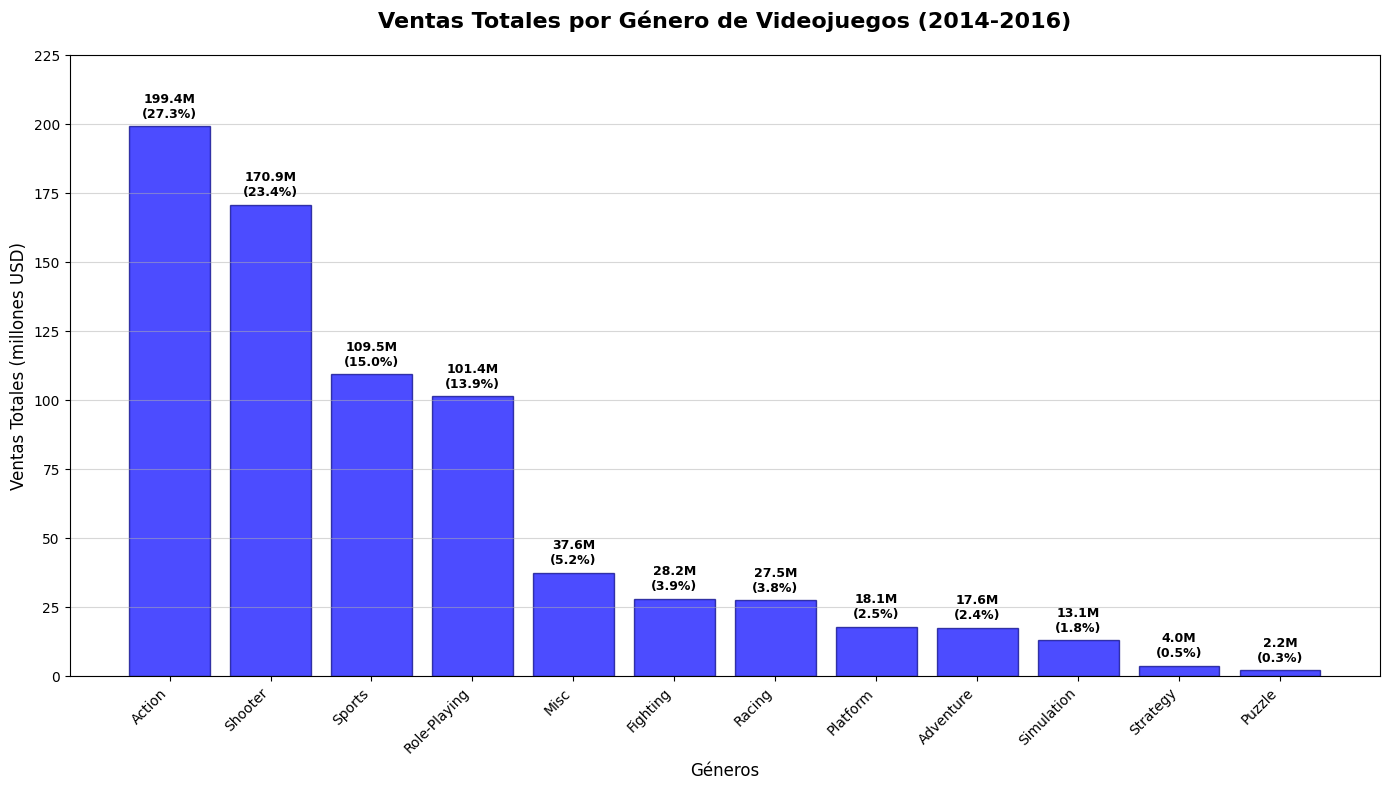

In [351]:
# Crear gráfico de barras para ventas totales por género
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras
bars = plt.bar(df_generos.index, df_generos['Ventas_Totales'], 
               color='blue', edgecolor='navy', alpha=0.7)

# Personalizar el gráfico
plt.title('Ventas Totales por Género de Videojuegos (2014-2016)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Géneros', fontsize=12)
plt.ylabel('Ventas Totales (millones USD)', fontsize=12)
plt.ylim(0,225)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}M\n({df_generos.iloc[i]["Porcentaje_Ventas"]:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# Agregar una cuadrícula para mejor lectura
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Los géneros más rentables son Action, Shooter, Sports y Role-Playing con ventas por encima de los 100 millones de USD en el periodo analizado 2014-2016.Por otra parte, se observa que los géneros con menores ventas son Strategy y Puzzle con menos de 4 millones de USD en ventas.

# 4. Perfil de usuario por Región (NA,UE,JP)

## 4.1 Las 5 Plataformas principales por región

In [352]:
# Crear análisis de ventas por región y plataforma desde 2014
regiones = ['na_sales', 'eu_sales', 'jp_sales']
nombres_regiones = ['Norteamérica', 'Europa', 'Japón']

# Diccionario para almacenar los resultados
top_plataformas_por_region = {}

print("=== Top 5 Platafomas por región (2014-2016) ===\n")

for i, region in enumerate(regiones):
    # Agrupar por plataforma y sumar ventas por región
    ventas_region = datos_recientes.groupby('platform')[region].sum().sort_values(ascending=False)
    
    # Obtener top 5
    top_5 = ventas_region.head(5)
    top_plataformas_por_region[nombres_regiones[i]] = top_5
    
    print(f"{nombres_regiones[i]}:")
    for j, (plataforma, ventas) in enumerate(top_5.items(), 1):
        print(f"  {j}. {plataforma}: {ventas:.2f}M USD")
    print()

=== Top 5 Platafomas por región (2014-2016) ===

Norteamérica:
  1. PS4: 98.61M USD
  2. XOne: 81.27M USD
  3. X360: 28.30M USD
  4. 3DS: 22.64M USD
  5. PS3: 22.05M USD

Europa:
  1. PS4: 130.04M USD
  2. XOne: 46.25M USD
  3. PS3: 25.54M USD
  4. PC: 17.97M USD
  5. 3DS: 16.12M USD

Japón:
  1. 3DS: 44.24M USD
  2. PS4: 15.02M USD
  3. PSV: 14.54M USD
  4. PS3: 11.22M USD
  5. WiiU: 7.31M USD



La plataforma PS4 lidera la cuota de mercado en Norteamérica y Europa, mientras que en Japón es líder la 3DS, esto puede deberse a cambios culturales más radicales entre las 2 primeras regiones y Japón. Por otra parte, el valor de ventas en Europa es de 40 millones de USD por encima del de Norteamérica. Se observa que la mayor cuota de mercado proviene de Europa.

## 4.2 Los 5 Géneros principales por región

In [353]:
# Crear análisis de ventas por región y genero desde 2014
regiones = ['na_sales', 'eu_sales', 'jp_sales']
nombres_regiones = ['Norteamérica', 'Europa', 'Japón']

# Diccionario para almacenar los resultados
top_generos_por_region = {}

print("=== Top 5 Géneros por región (2014-2016) ===\n")

for i, region in enumerate(regiones):
    # Agrupar por plataforma y sumar ventas por región
    ventas_region = datos_recientes.groupby('genre')[region].sum().sort_values(ascending=False)
    
    # Obtener top 5
    top_5 = ventas_region.head(5)
    top_generos_por_region[nombres_regiones[i]] = top_5
    
    print(f"{nombres_regiones[i]}:")
    for j, (genero, ventas) in enumerate(top_5.items(), 1):
        print(f"  {j}. {genero}: {ventas:.2f}M USD")
    print()

=== Top 5 Géneros por región (2014-2016) ===

Norteamérica:
  1. Shooter: 79.02M USD
  2. Action: 72.53M USD
  3. Sports: 46.13M USD
  4. Role-Playing: 33.47M USD
  5. Misc: 15.05M USD

Europa:
  1. Action: 74.68M USD
  2. Shooter: 65.52M USD
  3. Sports: 45.73M USD
  4. Role-Playing: 28.17M USD
  5. Racing: 14.13M USD

Japón:
  1. Role-Playing: 31.16M USD
  2. Action: 29.58M USD
  3. Fighting: 6.37M USD
  4. Misc: 5.61M USD
  5. Shooter: 4.87M USD



En Norteamérica el genero lider es shooter quizas por la cultura de facilidad de adquisición de armas en Estados uniddos, por otro lado, en Europa son más populares los juegos de Action y en Japón los de Role-Playing quizas por temas culturales en los que las personas son muy solitarias y tambien se evidencia que el juego lider en Norteamerica es el menos vendido en el top 5 en Japón.

## 4.3 Influencia de clasificaciones ESRB sobre las ventas por región

In [354]:
# Verificar las clasificaciones ESRB disponibles en datos recientes
print("Clasificaciones ESRB disponibles:")
print(datos_recientes['rating'].value_counts())
print(f"\nTotal de juegos con rating: {datos_recientes['rating'].notna().sum()}")
print(f"Total de juegos sin rating: {datos_recientes['rating'].isna().sum()}")


Clasificaciones ESRB disponibles:
M       308
T       302
E       229
E10+    195
Name: rating, dtype: int64

Total de juegos con rating: 1034
Total de juegos sin rating: 655


In [355]:
# Filtrar solo juegos con clasificación ESRB
datos_con_rating = datos_recientes[datos_recientes['rating'].notna()].copy()

# Calcular ventas por clasificación ESRB y región
ventas_esrb_region = datos_con_rating.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("Ventas por clasificación ESRB y región (2014-2016):")
print(ventas_esrb_region.round(2))


Ventas por clasificación ESRB y región (2014-2016):
        na_sales  eu_sales  jp_sales
rating                              
E          50.81     58.32      8.98
E10+       34.56     27.51      4.77
M         104.26    101.85      8.61
T          40.28     35.33     16.28


Para analizar el efecto de la clasificación ESBR sobre las ventas, primero se aclara el significado de las que se encuentran en la muestra analizada:
- E = (Everyone o para todos, todas las edades, minima violencia o lenguaje)
- E10+ (Everyone 10+ o para todos 10+, apropiado para 10 años en adelante)
- M (Mature 17+ - Maduros 17+, contenido explícito de violencia, lenguaje y temas adultos, no apto para menores de 17 años).
- T (Teen - Adolescentes, el contenido puede contener violencia fantástica, lenguaje moderado y temáticas más adultas, pero generalmente no gráficas).

De acuerdo con lo anterior se observa que la cuota del mercado más alta la brindadn los juegos con clasificación M en las regiones de Norteamérica y Europa ya que constituyen personas en un rango de edad que tienen ingresos suficientes para adquirrir videojuegos, luego siguen los de clasificación E para las mismas regiones ya que en su mayoria pueden ser para niños comprados por sus padres. Respecto a Japón, se observa que la cuota en su mayoría corresponde a juegos para adolescentes, ya que son los que tienen mayor tiempo de ocio. Por ende, si se observa la influencia del tipo de juego sobre el total de ventas por cada región, teniendo en cuenta sus diferencias culturales.

# 5. Prueba de Hipótesis

## 5.1 Calificaciones promedio de usuarios en Plataformas Xbox One y PC son iguales

In [356]:
# Definir las hipótesis
print("=== Prueba de Hipótesis 1 ===")
print("H₀ (Hipótesis nula): Las calificaciones promedio de usuarios son IGUALES entre Xbox One y PC")
print("H₁ (Hipótesis alternativa): Las calificaciones promedio de usuarios son DIFERENTES entre Xbox One y PC")
print("Nivel de significancia: α = 0.05")
print()

# Filtrar datos de Xbox One y PC con calificaciones de usuario
xbox_scores = datos_recientes[(datos_recientes['platform'] == 'XOne') & 
                             (datos_recientes['user_score'].notna())]['user_score']

pc_scores = datos_recientes[(datos_recientes['platform'] == 'PC') & 
                           (datos_recientes['user_score'].notna())]['user_score']

print("=== Análisis Descriptivo ===")
print(f"Xbox One - Cantidad de juegos: {len(xbox_scores)}")
print(f"Xbox One - Promedio: {xbox_scores.mean():.3f}")
print(f"Xbox One - Desviación estándar: {xbox_scores.std():.3f}")
print()
print(f"PC - Cantidad de juegos: {len(pc_scores)}")
print(f"PC - Promedio: {pc_scores.mean():.3f}")
print(f"PC - Desviación estándar: {pc_scores.std():.3f}")


=== Prueba de Hipótesis 1 ===
H₀ (Hipótesis nula): Las calificaciones promedio de usuarios son IGUALES entre Xbox One y PC
H₁ (Hipótesis alternativa): Las calificaciones promedio de usuarios son DIFERENTES entre Xbox One y PC
Nivel de significancia: α = 0.05

=== Análisis Descriptivo ===
Xbox One - Cantidad de juegos: 165
Xbox One - Promedio: 6.595
Xbox One - Desviación estándar: 1.375

PC - Cantidad de juegos: 122
PC - Promedio: 6.298
PC - Desviación estándar: 1.703


In [363]:
# Verificar normalidad de los datos
print("=== Verificación de Normalidad ===")

# Test de Shapiro-Wilk para Xbox One
stat_xbox, p_xbox = stats.shapiro(xbox_scores)
print(f"Xbox One - Shapiro-Wilk:")
print(f"  Estadístico: {stat_xbox:.4f}")
print(f"  p-valor: {p_xbox:.6f}")
print(f"  ¿Normal? {'Sí' if p_xbox > 0.05 else 'No'}")

# Test de Shapiro-Wilk para PC
stat_pc, p_pc = stats.shapiro(pc_scores)
print(f"\nPC - Shapiro-Wilk:")
print(f"  Estadístico: {stat_pc:.4f}")
print(f"  p-valor: {p_pc:.6f}")
print(f"  ¿Normal? {'Sí' if p_pc > 0.05 else 'No'}")


=== Verificación de Normalidad ===
Xbox One - Shapiro-Wilk:
  Estadístico: 0.9532
  p-valor: 0.000026
  ¿Normal? No

PC - Shapiro-Wilk:
  Estadístico: 0.9497
  p-valor: 0.000180
  ¿Normal? No


In [358]:
#Verificar el tamaño de la muestra:
print(f"\n=== Tamaño de muestra ===")
print(f"Xbox One: {len(xbox_scores)} observaciones")
print(f"PC: {len(pc_scores)} observaciones")
print(f"¿Muestras grandes (n≥30)? {'Sí' if min(len(xbox_scores), len(pc_scores)) >= 30 else 'No'}")


=== Tamaño de muestra ===
Xbox One: 165 observaciones
PC: 122 observaciones
¿Muestras grandes (n≥30)? Sí


In [359]:
# Test de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(xbox_scores, pc_scores)
print(f"\n=== Homogeneidad de Varianzas ===")
print(f"Test de Levene:")
print(f"  Estadístico: {stat_levene:.4f}")
print(f"  p-valor: {p_levene:.6f}")
print(f"  ¿Varianzas iguales? {'Sí' if p_levene > 0.05 else 'No'}")



=== Homogeneidad de Varianzas ===
Test de Levene:
  Estadístico: 6.0048
  p-valor: 0.014868
  ¿Varianzas iguales? No


Teniendo en cuenta que los datos No siguen una distribución normal para ambas plataformas y que Las varianzas No son homogéneas, además que las muestras son independientes entre Xbox One y PC, se utilizará el test de Mann - Whitney U para probar la hipótesis sugerida en el proyecto.

In [361]:
# Realizar el test de Mann-Whitney U
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(xbox_scores, pc_scores, alternative='two-sided')

print("=== Resultados del Test ===")
print(f"Estadístico U: {statistic}")
print(f"p-valor: {p_value:.6f}")
print(f"Nivel de significancia: α = 0.05")
print()

# Interpretación de resultados
if p_value < 0.05:
    print("Decisión: Rechazamos H₀")
    print("Conclusión: Existe evidencia estadística significativa de que")
    print("las medianas de calificaciones de usuario son DIFERENTES entre Xbox One y PC")
else:
    print("Decisión: No rechazamos H₀")
    print("Conclusión: No hay evidencia estadística suficiente para afirmar")
    print("que las medianas de calificaciones de usuario son diferentes entre Xbox One y PC")


=== Resultados del Test ===
Estadístico U: 10820.0
p-valor: 0.277529
Nivel de significancia: α = 0.05

Decisión: No rechazamos H₀
Conclusión: No hay evidencia estadística suficiente para afirmar
que las medianas de calificaciones de usuario son diferentes entre Xbox One y PC


Según el resultado de la prueba de Hipótesis, si hay evidencia estadística para aprobar la Hipótesis Nula de que las medianas son iguales entre las plataformas Xbox One y PC, por otra parte en el detalle estadístico se observa una media de 6,5 y 6,2 por lo que las calificaciones promedio son muy cercanas en la muestra del 2014 al 2016.

In [374]:
#Comparación de Medianas
print(f"\n=== Comparación de Medianas ===")
print(f"Mediana Action: {xbox_scores.median():.3f}")
print(f"Mediana Sports: {pc_scores.median():.3f}")
print(f"Diferencia de medianas: {xbox_scores.median() - pc_scores.median():.3f}")


=== Comparación de Medianas ===
Mediana Action: 6.800
Mediana Sports: 6.800
Diferencia de medianas: 0.000


## 5.2 Calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes

In [370]:
# Definir las hipótesis
print("=== Prueba de Hipótesis 2 ===")
print("H₀ (Hipótesis nula): Las calificaciones promedio de usuarios son IGUALES entre Acción y Deportes")
print("H₁ (Hipótesis alternativa): Las calificaciones promedio de usuarios son DIFERENTES entre Acción y Deportes")
print("Nivel de significancia: α = 0.05")
print()

# Filtrar datos de Acción y Deportes con calificaciones de usuario
action_scores = datos_recientes[(datos_recientes['genre'] == 'Action') & 
                             (datos_recientes['user_score'].notna())]['user_score']

sports_scores = datos_recientes[(datos_recientes['genre'] == 'Sports') & 
                           (datos_recientes['user_score'].notna())]['user_score']

print("=== Análisis Descriptivo ===")
print(f"Action - Cantidad de juegos: {len(action_scores)}")
print(f"Action - Promedio: {action_scores.mean():.3f}")
print(f"Action - Desviación estándar: {action_scores.std():.3f}")
print()
print(f"Sports - Cantidad de juegos: {len(sports_scores)}")
print(f"Sports - Promedio: {sports_scores.mean():.3f}")
print(f"Sports - Desviación estándar: {sports_scores.std():.3f}")


=== Prueba de Hipótesis 2 ===
H₀ (Hipótesis nula): Las calificaciones promedio de usuarios son IGUALES entre Acción y Deportes
H₁ (Hipótesis alternativa): Las calificaciones promedio de usuarios son DIFERENTES entre Acción y Deportes
Nivel de significancia: α = 0.05

=== Análisis Descriptivo ===
Action - Cantidad de juegos: 297
Action - Promedio: 6.761
Action - Desviación estándar: 1.378

Sports - Cantidad de juegos: 127
Sports - Promedio: 5.225
Sports - Desviación estándar: 1.857


In [366]:
# Verificar normalidad de los datos
print("=== Verificación de Normalidad ===")

# Test de Shapiro-Wilk para Action
stat_action, p_action = stats.shapiro(action_scores)
print(f"Action - Shapiro-Wilk:")
print(f"  Estadístico: {stat_action:.4f}")
print(f"  p-valor: {p_action:.6f}")
print(f"  ¿Normal? {'Sí' if p_action > 0.05 else 'No'}")

# Test de Shapiro-Wilk para Sports
stat_sports, p_sports = stats.shapiro(sports_scores)
print(f"\nSports - Shapiro-Wilk:")
print(f"  Estadístico: {stat_sports:.4f}")
print(f"  p-valor: {p_sports:.6f}")
print(f"  ¿Normal? {'Sí' if p_sports > 0.05 else 'No'}")


=== Verificación de Normalidad ===
Action - Shapiro-Wilk:
  Estadístico: 0.9068
  p-valor: 0.000000
  ¿Normal? No

Sports - Shapiro-Wilk:
  Estadístico: 0.9778
  p-valor: 0.034662
  ¿Normal? No


In [367]:
#Verificar el tamaño de la muestra:
print(f"\n=== Tamaño de muestra ===")
print(f"Action: {len(action_scores)} observaciones")
print(f"Sports: {len(sports_scores)} observaciones")
print(f"¿Muestras grandes (n≥30)? {'Sí' if min(len(action_scores), len(sports_scores)) >= 30 else 'No'}")


=== Tamaño de muestra ===
Action: 297 observaciones
Sports: 127 observaciones
¿Muestras grandes (n≥30)? Sí


In [368]:
# Test de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(action_scores, sports_scores)
print(f"\n=== Homogeneidad de Varianzas ===")
print(f"Test de Levene:")
print(f"  Estadístico: {stat_levene:.4f}")
print(f"  p-valor: {p_levene:.6f}")
print(f"  ¿Varianzas iguales? {'Sí' if p_levene > 0.05 else 'No'}")


=== Homogeneidad de Varianzas ===
Test de Levene:
  Estadístico: 21.6074
  p-valor: 0.000004
  ¿Varianzas iguales? No


In [369]:
# Realizar el test de Mann-Whitney U para géneros
statistic_genres, p_value_genres = mannwhitneyu(action_scores, sports_scores, alternative='two-sided')

print("=== Resultados del Test ===")
print(f"Estadístico U: {statistic_genres}")
print(f"p-valor: {p_value_genres:.6f}")
print(f"Nivel de significancia: α = 0.05")
print()

# Interpretación de resultados
if p_value_genres < 0.05:
    print("Decisión: Rechazamos H₀")
    print("Conclusión: Existe evidencia estadística significativa de que")
    print("las medianas de calificaciones de usuario son DIFERENTES entre Acción y Deportes")
else:
    print("Decisión: No rechazamos H₀")
    print("Conclusión: No hay evidencia estadística suficiente para afirmar")
    print("que las medianas de calificaciones de usuario son diferentes entre Acción y Deportes")

=== Resultados del Test ===
Estadístico U: 28428.5
p-valor: 0.000000
Nivel de significancia: α = 0.05

Decisión: Rechazamos H₀
Conclusión: Existe evidencia estadística significativa de que
las medianas de calificaciones de usuario son DIFERENTES entre Acción y Deportes


Según el resultado de la prueba de Hipótesis, si hay evidencia estadística para Rechazar la Hipótesis Nula de que las medianas son iguales entre los géneros Action y Sports, aclarando que la hipótesis de que las calificaciones promedio de los usuarios para dichos géeros si son diferentes. Por otra parte en el detalle estadístico se observa una media de 6,7 y 5,2 por lo que las calificaciones promedio si tienen diferencia en la muestra del 2014 al 2016.

In [372]:
#Comparación de Medianas
print(f"\n=== Comparación de Medianas ===")
print(f"Mediana Action: {action_scores.median():.3f}")
print(f"Mediana Sports: {sports_scores.median():.3f}")
print(f"Diferencia de medianas: {action_scores.median() - sports_scores.median():.3f}")


=== Comparación de Medianas ===
Mediana Action: 7.100
Mediana Sports: 5.500
Diferencia de medianas: 1.600


# 6. Conclusión General

Par poder realizar el análisis completo del dataset frente a los requisitos del proyecto, se dividió e proceso en 5 pasos:
- En el primer paso se realizó la lectura del dataset para poder trabajarlo en Jupyter.
- En el segundo paso se realizó la preparación de los datos corrigiendo el nombre de las columnas, los tipos de datos, validando la mejor forma de rellenar los valores nulos cuando correspondía y enriqueciendo los datos con la columna de ventas totales que se usaría más adelante para generar comparaciones entre plataformas, años, géneros, reseñas y clasificaciones.
- En el tercer paso se realizó un análisis detallado sobre el comportamiento del lanzamiento de juegos, encontrando una brecha entre 2006 y 2011 donde no hubo lanzamientos, tema que merece una validación sobre la integridad de los datos. Por otra parte, se identificó que la plataforma que genera mayor cantidad de ventas es PS2 entre las 31 del dataset y que para reducir la cantidad de datos analizados se tomó el perido del año 2014 al 2016 teniendo en cuenta que el ejercicio indica la posibilidad de información incompleta para el año 2016 y se debia asegurar por lo menos la comparación entre  2 años: 2014 y 2015. Respecto al impacto de las reseñas sobre las ventas, si se observa que se generan mayores ventas aunque no crecen en una gran proporción, su crecimiento es moderado y se presentan datos atípicos en algunos casos.
- En el cuarto paso se hacen análisis por región sobre las plataformas y generos principales demostrando las diferencias entre culturas sobre los juegos más vendidos y el impacto de la clasificacion ESRB sobre la posibilidad de adquisición de dichos juegos, siendo los M los más comprados ya que tienen contenido violento y de lenguaje inapropiado que llama la atención entre personas desde los 17 años.
- Por último, se generaron 2 pruebas de hipótesis sugeridas en el proyecto donde se concluye que las calificaciones promedio entre 2 plataformas de la muestra son iguales y que la comparación entre 2 géneros sí es diferente respecto a las calificaciones emitidas por los usuarios. El umbral Alpha se seleccionó buscando cubrir en un 99,95% la confiabilidad de la muestra.
- 
Por lo general los juegos con mayor éxito corresponden a las clasificaciones M y E puesto que son los que adquieren los adultos o en su defecto los que adquieren los adultos para compartir con sus hijos; adicional las plataformas PS4 y XOne son las que mayor cuota en el mercado representan. Es importante enfocar los planes de mercadeo en dichas clasificaciones y plataformas que representan a la fecha el mayor valor de ventas en millones de USD, por otro lado, se pueden generar ofertas ya que el adulto requiere juegos específicos para él y otros para compartir con los de edades menores.